In [3]:
import pandas as pd
import os
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
import re

In [100]:
# Download NLTK data (if not already downloaded)
#nltk.download("punkt")
#nltk.download("stopwords")

In [4]:
csv_directory = "C:/Users/annar/OneDrive/Desktop/Visual Studio/GitHub/Projects2/Insighter/Zomato_food_reviews/Data"
os.chdir(csv_directory)


In [5]:
# Load the CSV dataset
data = pd.read_csv("./csv_files/drunken_monkey.csv")
data.head()

,Reviews
0,This place specializes in smoothies as well as...
1,The milk shake tasted so good that I took back...
2,The chicken sandwich also tasted really good. ...
3,"Excellent recipes, natural tastes, well crafte..."
4,good


In [7]:
def converting_to_list(path):
    final_list = []
    # opening the file in read mode
    my_file = open(path, "r")

    # reading the file
    data = my_file.read()

    # replacing end splitting the text
    # when newline ('\n') is seen.
    data_into_list = data.split("\n")
    for i in data_into_list:
        i = i.lower()
        final_list.append(i)

    return final_list
    my_file.close()

In [8]:
def positive(words_list,text):
    if any(map(lambda v: v in words_list, text)):
        answer = "positive"
    else:
        answer = 1
    return answer

In [9]:
def negative_neutral(words_list,text):
    if any(map(lambda v: v in words_list, text)):
        answer = "negative"
    else:
        answer = "neutral"
    return answer

In [31]:
def analyze_sentiment_based_on_criterion(text, criterion):
    text = text.lower()
    text = text.split()

    if criterion == "Taste of food":
        path = "./txt_files/word_bags/taste_of_food_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/taste_of_food_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment

In [ ]:
# Define the judging criteria
criteria = [
    "Taste of food",
    "Quality of food",
    "Quantity of food",
    "Location",
    "Accessibility",
    "Delivery Agent's behavior and time taken",
    "Packaging of food delivered",
    "How healthy the food is",
    "Presentation of the food",
    "Décor/ambience of the restaurant",
]

In [38]:
# Create a dictionary to store the results
results = {}

data["cleaned_review"] = data["Reviews"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x).lower())

data_list = []
taste_food = []
for i in range(len(data)):
    data_list.append(data.loc[i,"cleaned_review"])

data_list

for i in data_list:
    taste_food.append(analyze_sentiment_based_on_criterion(i, "Taste of food"))

data['Taste of food'] = pd.Series(taste_food)

# Calculate the percentage of positive, neutral, and negative reviews
sentiment_counts = data["Taste of food"].value_counts(normalize=True) * 100
    
# Store the results in the dictionary
results["Taste of food"] = {
    "Positive": sentiment_counts.get("positive", 0),
    "Neutral": sentiment_counts.get("neutral", 0),
    "Negative": sentiment_counts.get("negative", 0),
}

In [39]:
results

{'Taste of food': {'Positive': 27.142857142857142,
  'Neutral': 71.0204081632653,
  'Negative': 1.8367346938775513}}

In [40]:
data.head()

,Reviews,cleaned_review,Taste of food
0,This place specializes in smoothies as well as...,this place specializes in smoothies as well as...,neutral
1,The milk shake tasted so good that I took back...,the milk shake tasted so good that i took back...,positive
2,The chicken sandwich also tasted really good. ...,the chicken sandwich also tasted really good i...,positive
3,"Excellent recipes, natural tastes, well crafte...",excellent recipes natural tastes well crafted ...,neutral
4,good,good,positive


In [41]:
plot_dict = {}
for criterion, sentiment_counts in results.items():
    plot_dict.update({criterion: sentiment_counts})

print(plot_dict)

{'Taste of food': {'Positive': 27.142857142857142, 'Neutral': 71.0204081632653, 'Negative': 1.8367346938775513}}


In [42]:
import matplotlib.pyplot as plt
import numpy as np

def plotting(plot_dict):
    categories = list(plot_dict.keys())
    sentiments = ['Positive', 'Neutral', 'Negative']
    num_categories = len(categories)
    width = 0.2

    fig, ax = plt.subplots()

    for i, sentiment in enumerate(sentiments):
        x = np.arange(len(categories)) + i * width
        y = [plot_dict[category][sentiment] for category in categories]
        ax.bar(x, y, width, label=sentiment)

    ax.set_ylabel('Percentage (%)')
    ax.set_title('Sentiment Analysis by Category')
    ax.set_xticks(np.arange(len(categories)) + width * (len(sentiments) - 1) / 2)
    ax.set_xticklabels(categories, rotation=45, ha='right')  # Corrected x-axis tick labels
    ax.legend(title='Sentiments')

    plt.tight_layout()
    plt.show()
    plt.show()


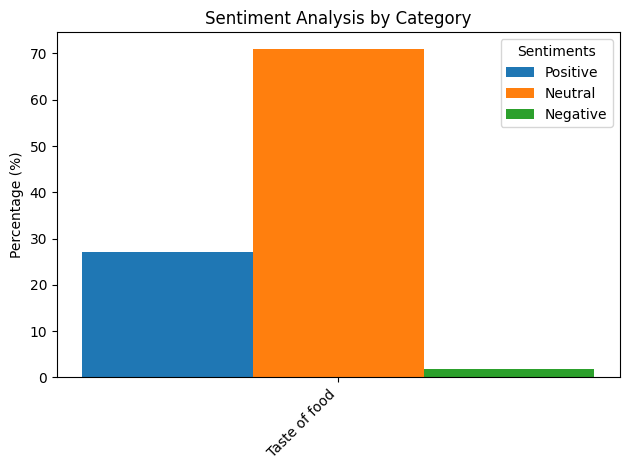

In [43]:
plotting(plot_dict)